In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from xclib.data import data_utils
import numpy as np
import time
import pickle
from sklearn.base import clone
from sklearn import ensemble
import os

In [34]:
print("----------------Reading the Data-------------------------")
PATH = os.getcwd()
os.chdir('ass3_parta_data/')

X_train = data_utils.read_sparse_file('train_x.txt', force_header=True)
train_class = np.genfromtxt('train_y.txt').reshape(-1, 1)

X_valid = data_utils.read_sparse_file('valid_x.txt', force_header=True)
valid_class = np.genfromtxt('valid_y.txt').reshape(-1, 1)

X_test = data_utils.read_sparse_file('test_x.txt', force_header=True)
test_class = np.genfromtxt('test_y.txt').reshape(-1, 1)

----------------Reading the Data-------------------------


/home/ayushi/.local/lib/python3.6/site-packages/xclib-0.96-py3.6-linux-x86_64.egg/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


In [36]:
f = open('train_x.txt') 
m,n = f.readlines()[0].rstrip("\n").split(" ")
m,n = int(m),int(n)
f.close()

print("The number of training samples are = ", m)
print("The number of attributes are = ", n)

os.chdir(PATH)

The number of training samples are =  64713
The number of attributes are =  482


params = {'n_estimators': 100, 'max_depth': 10, 'subsample': 1,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train.A, train_class.ravel())

# Experiment with the Learning Rate in the GB trees.

In [ ]:
print("----------Exploring the affect of learning rate on Gradient Boosted Trees------------------------")
print("------------------Training with different LR----------------------------------------")

In [41]:
lr_rf = []
lr = [0.001, 0.01, 0.03, 0.1, 0.3, 1, 1.3]
lr_train_acc = []
lr_val_acc = []
lr_test_acc = []

for l in lr:
    lr_rf.append(ensemble.GradientBoostingClassifier(learning_rate=l, max_depth=10, 
                                                     subsample=0.5))

In [42]:
for i in range(len(lr_rf)):
    lr_rf[i].fit(X_train.A, train_class.ravel())
    lr_train_acc.append(lr_rf[i].score(X_train.A, train_class.ravel()))
    lr_val_acc.append(lr_rf[i].score(X_valid.A, valid_class.ravel()))
    lr_test_acc.append(lr_rf[i].score(X_test.A, test_class.ravel()))

In [43]:
lr_train_acc = [x*100 for x in lr_train_acc]
lr_val_acc = [x*100 for x in lr_val_acc]
lr_test_acc = [x*100 for x in lr_test_acc]

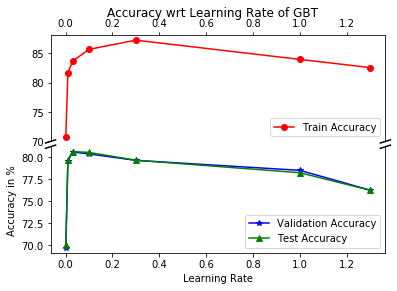

In [47]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(lr, lr_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(lr, lr_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Learning Rate")
ax2.set_ylabel("Accuracy in %")

ax1.plot(lr, lr_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

#This broken axis code taken from matplotlib library
d = .015  # how big to make the diagonal lilrs in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Accuracy wrt Learning Rate of GBT")
plt.subplots_adjust(hspace=0.05)
#f.savefig("plots/parte/lr.png", dpi = 1000)
#plt.show()

#### Exponential Loss performs similar to deviance on this dataset
print(clf.score(X_train.A, train_class.ravel()))
print(clf.score(X_valid.A, valid_class.ravel()))
print(clf.score(X_test.A, test_class.ravel()))

# Experiment with the number of boosting stages in the GB trees.

In [ ]:
print("----------Exploring the affect of number of boosting stages in Gradient Boosted Trees------------")

In [12]:
ne_rf = []
n_estimator = [x for x in range(50, 451, 100)]
ne_train_acc = []
ne_val_acc = []
ne_test_acc = []

for n_esti in n_estimator:
    ne_rf.append(ensemble.GradientBoostingClassifier(n_estimators=n_esti, learning_rate=0.01, max_depth=10, 
                                                     subsample=0.5))

In [13]:
for i in range(len(ne_rf)):
    ne_rf[i].fit(X_train.A, train_class.ravel())
    ne_train_acc.append(ne_rf[i].score(X_train.A, train_class.ravel()))
    ne_val_acc.append(ne_rf[i].score(X_valid.A, valid_class.ravel()))
    ne_test_acc.append(ne_rf[i].score(X_test.A, test_class.ravel()))

In [14]:
ne_train_acc = [x*100 for x in ne_train_acc]
ne_val_acc = [x*100 for x in ne_val_acc]
ne_test_acc = [x*100 for x in ne_test_acc]

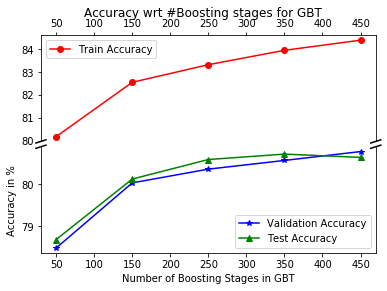

In [15]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(n_estimator, ne_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(n_estimator, ne_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Number of Boosting Stages in GBT")
ax2.set_ylabel("Accuracy in %")

ax1.plot(n_estimator, ne_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

#This broken axis code taken from matplotlib library
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Accuracy wrt #Boosting stages for GBT")
plt.subplots_adjust(hspace=0.05)
f.savefig("plots/parte/n-estimators.png", dpi = 1000)
#plt.show()

# Experiment with the min sample split of weak learner in the GB trees.

In [ ]:
print("----------Exploring the affect of min sample split of the learner in Gradient Boosted Trees------------")

In [16]:
mss_rf = []
mss = [x for x in range(2, 17, 2)]
mss_train_acc = []
mss_val_acc = []
mss_test_acc = []

for m in mss:
    mss_rf.append(ensemble.GradientBoostingClassifier(min_samples_split=m, learning_rate=0.01, max_depth=10, 
                                                      subsample=0.5))

In [17]:
for i in range(len(mss_rf)):
    mss_rf[i].fit(X_train.A, train_class.ravel())
    mss_train_acc.append(mss_rf[i].score(X_train.A, train_class.ravel()))
    mss_val_acc.append(mss_rf[i].score(X_valid.A, valid_class.ravel()))
    mss_test_acc.append(mss_rf[i].score(X_test.A, test_class.ravel()))

In [18]:
mss_train_acc = [x*100 for x in mss_train_acc]
mss_val_acc = [x*100 for x in mss_val_acc]
mss_test_acc = [x*100 for x in mss_test_acc]

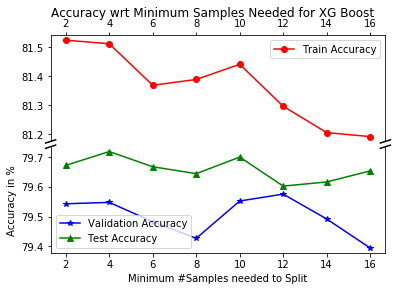

In [21]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(mss, mss_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(mss, mss_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Minimum #Samples needed to Split")
ax2.set_ylabel("Accuracy in %")

ax1.plot(mss, mss_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Accuracy wrt Minimum Samples Needed for XG Boost")
plt.subplots_adjust(hspace=0.05)
#f.savefig("plots/parte/min_samples.png", dpi = 1000)
#plt.show()

# Experiment with the depth of weak learner in the GB trees.

In [ ]:
print("----------Exploring the affect of depth of the learner in Gradient Boosted Trees------------")

In [20]:
max_dep_rf = []
max_dep = [x for x in range(1, 42, 5)]
max_dep_train_acc = []
max_dep_val_acc = []
max_dep_test_acc = []

for m in max_dep:
    max_dep_rf.append(ensemble.GradientBoostingClassifier(learning_rate=0.01, max_depth=m, 
                                                      subsample=0.5))

In [46]:
for i in range(len(max_dep_rf)):
    max_dep_rf[i].fit(X_train.A, train_class.ravel())
    max_dep_train_acc.append(max_dep_rf[i].score(X_train.A, train_class.ravel()))
    max_dep_val_acc.append(max_dep_rf[i].score(X_valid.A, valid_class.ravel()))
    max_dep_test_acc.append(max_dep_rf[i].score(X_test.A, test_class.ravel()))

In [47]:
max_dep_train_acc = [x*100 for x in max_dep_train_acc]
max_dep_val_acc = [x*100 for x in max_dep_val_acc]
max_dep_test_acc = [x*100 for x in max_dep_test_acc]

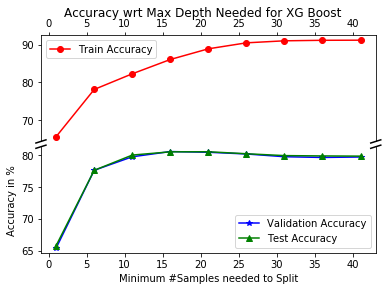

In [48]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(max_dep, max_dep_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(max_dep, max_dep_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Max Depth of weak learner")
ax2.set_ylabel("Accuracy in %")

ax1.plot(max_dep, max_dep_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Accuracy wrt Max Depth Needed for XG Boost")
plt.subplots_adjust(hspace=0.05)
#f.savefig("plots/parte/max-depth.png", dpi = 1000)
#plt.show()